In [1]:
#import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression



In [2]:
#load the results data from local directory
results= pd.read_csv(r'C:\Users\HP\Documents\results.csv')

In [3]:
#view the last five rows of the data 
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [4]:
results.describe()

,home_score,away_score
count,42365.000000,42365.000000
mean,1.743940,1.185861
std,1.753251,1.404554
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [5]:
#explore the data to check for data types 
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42369 entries, 0 to 42368
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        42369 non-null  object 
 1   home_team   42369 non-null  object 
 2   away_team   42369 non-null  object 
 3   home_score  42365 non-null  float64
 4   away_score  42365 non-null  float64
 5   tournament  42369 non-null  object 
 6   city        42369 non-null  object 
 7   country     42369 non-null  object 
 8   neutral     42369 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.6+ MB


In [6]:
#confirming the total number of samples it can be seeb that 'home_score and away_score both has '
results.count()

date          42369
home_team     42369
away_team     42369
home_score    42365
away_score    42365
tournament    42369
city          42369
country       42369
neutral       42369
dtype: int64

In [7]:
#checking for missing values
results[results['home_score'].isnull()]   

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
42365,2021-06-28,Argentina,Bolivia,NaN,NaN,Copa América,Cuiaba,Brazil,True
42366,2021-06-28,Uruguay,Paraguay,NaN,NaN,Copa América,Rio de Janeiro,Brazil,True
42367,2021-06-30,Mexico,Panama,NaN,NaN,Friendly,Nashville,United States,True
42368,2021-07-02,Mexico,Nigeria,NaN,NaN,Friendly,Nashville,United States,True


it appears from above that four missing values in the home_score and away_score respectively
in addition two of the missing scores are from copper america held on a neutral ground in june 2021 while 
the other two missing scores are from two friendly matches also held on a neutral ground precisely the USA, both friendly 
matches involved Mexico as the home team.

In [8]:
#confirm the mode of both features (home_score and away_score)
print(results['home_score'].mode())
print(results['away_score'].mode())

0    1.0
dtype: float64
0    0.0
dtype: float64


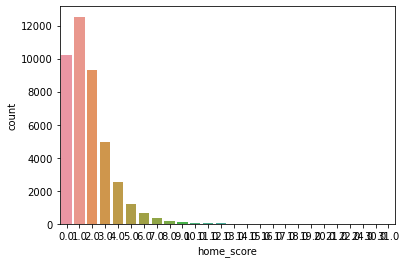

In [9]:
#visualizing the modal score using count plot, for home_results
mode_plot = sns.countplot(x="home_score", data=results)


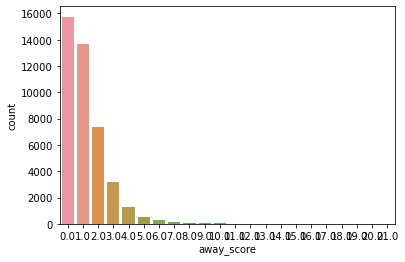

In [10]:
##visualizing the modal score using count plot, for away_results
mode_plot = sns.countplot(x="away_score", data=results)

In [11]:
#handle missing values by replacing with the modal values of each feature respectively
values = {'home_score':1,'away_score':0}
com_results=results.fillna(value=values)
com_results.count()

date          42369
home_team     42369
away_team     42369
home_score    42369
away_score    42369
tournament    42369
city          42369
country       42369
neutral       42369
dtype: int64

In [12]:
#seperating the month and year of match from date
com_results['date'] = pd.to_datetime(com_results['date'])
com_results['year'] = pd.DatetimeIndex(com_results['date']).year
com_results['month'] = pd.DatetimeIndex(com_results['date']).month

In [13]:
com_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,3


In [14]:
com_results['month']=com_results['month'].replace({1:'jan',2:'feb',3:'mar',4:'April',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
    )

In [15]:
com_results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,nov
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,mar
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,mar
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,mar
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,mar
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False,1876,mar
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,1877,mar
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,1877,mar
8,1878-03-02,Scotland,England,7.0,2.0,Friendly,Glasgow,Scotland,False,1878,mar
9,1878-03-23,Scotland,Wales,9.0,0.0,Friendly,Glasgow,Scotland,False,1878,mar


groupby home team and home score to know the highest and lowest by their home performance
do similar approach to know highest and lowest by away performance 
plot home_score vs away_score to visualize the result.

find the best team of all time.. Create another column named 'won' this will be filled with home_result minus away_result
and then summed up, then do a pd.mode or plot a count plot of that column.


In [16]:
# feature engineering to create a win column
wins= com_results['home_score'] - com_results['away_score']
com_results['win']=wins
com_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,win
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,nov,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,mar,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,mar,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,mar,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,mar,3.0


In [17]:
#plot to see the highest wins
#calculate percent home win and percent away win to ascertain the team that won more in either home or away.


In [18]:
def win(x):
    x==0
    if x>0:
        return 1
    elif x<0:
        return 2
    else:
        return 0

In [19]:
win(-2)

2

In [20]:
com_results['win']=com_results['win'].apply(win)

In [21]:
com_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,win
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,nov,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,mar,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,mar,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,mar,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,mar,1
...,...,...,...,...,...,...,...,...,...,...,...,...
42364,2021-06-27,El Salvador,Guatemala,0.0,0.0,Friendly,Los Angeles,United States,True,2021,june,0
42365,2021-06-28,Argentina,Bolivia,1.0,0.0,Copa América,Cuiaba,Brazil,True,2021,june,1
42366,2021-06-28,Uruguay,Paraguay,1.0,0.0,Copa América,Rio de Janeiro,Brazil,True,2021,june,1
42367,2021-06-30,Mexico,Panama,1.0,0.0,Friendly,Nashville,United States,True,2021,june,1


In [22]:
#lets declare our x and y features 
feature=np.asarray(com_results[['home_score','away_score']])
y=np.asarray(com_results['win'])
print(feature)
print(y)

[[0. 0.]
 [4. 2.]
 [2. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[0 1 1 ... 1 1 1]


In [23]:
from sklearn import preprocessing 
scale= (feature)
#assuming you have your feature named feature, instantiate minmax_scaler
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
#fit and transform feature 
X=minmax_scale.fit_transform(feature)
X

array([[0.        , 0.        ],
       [0.12903226, 0.0952381 ],
       [0.06451613, 0.04761905],
       ...,
       [0.03225806, 0.        ],
       [0.03225806, 0.        ],
       [0.03225806, 0.        ]])

In [24]:
# split feature and target into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (29658, 2) (29658,)
Test set: (12711, 2) (12711,)


# Train different classification algorithms with the training set of the data (X)

In [25]:
#instantiate Logistic regressionand fit data 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, jaccard_score
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [26]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
#Evaluating the Model using jaccard similarity score metrics
jaccard_score(y_test, yhat, average=None)


array([0.        , 0.52231038, 0.27370749])

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])


Confusion matrix, without normalization
[[   0 2972    0]
 [   0 6122    0]
 [   0 2627  990]]


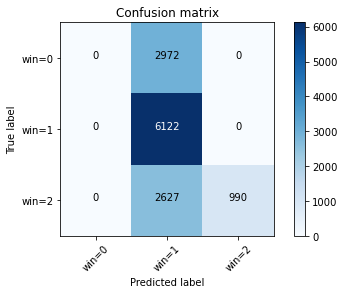

In [29]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['win=0','win=1','win=2'],normalize= False,  title='Confusion matrix')

In [30]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2972
           1       0.52      1.00      0.69      6122
           2       1.00      0.27      0.43      3617

    accuracy                           0.56     12711
   macro avg       0.51      0.42      0.37     12711
weighted avg       0.54      0.56      0.45     12711



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
